In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

In [ ]:
# Import the dataset
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')

In [ ]:
# Add an 'id' column as a unique identifier
df_hotels = df_hotels.reset_index().rename(columns={'index': 'id'})

In [ ]:
# Define a function to check data types, null values, and unique values
def check_values(df):
    data = []
    for column in df.columns:
        data.append([
            column,
            df[column].dtype,
            df[column].isna().sum(),
            round(100 * (df[column].isna().sum() / len(df)), 2),
            df[column].nunique()
        ])
    return pd.DataFrame(columns=['Data_Features', 'Data_Type', 'Null', 'Null_Percentage', 'Unique_Value'], data=data)

# Check the values for each column in the DataFrame
check_values(df_hotels)

,Data_Features,Data_Type,Null,Null_Percentage,Unique_Value
0,id,int64,0,0.00,119390
1,hotel,object,0,0.00,2
2,is_canceled,int64,0,0.00,2
3,lead_time,int64,0,0.00,479
4,arrival_date_year,int64,0,0.00,3
5,arrival_date_month,object,0,0.00,12
6,arrival_date_week_number,int64,0,0.00,53
7,arrival_date_day_of_month,int64,0,0.00,31
8,stays_in_weekend_nights,int64,0,0.00,17
9,stays_in_week_nights,int64,0,0.00,35


In [ ]:
# Count visitors who cancel and don't cancel reservations
df_hotels.is_canceled.value_counts()

# Calculate the proportion of canceled and non-canceled reservations
df_hotels.is_canceled.value_counts(normalize=True)

,proportion
is_canceled,
0,0.629584
1,0.370416


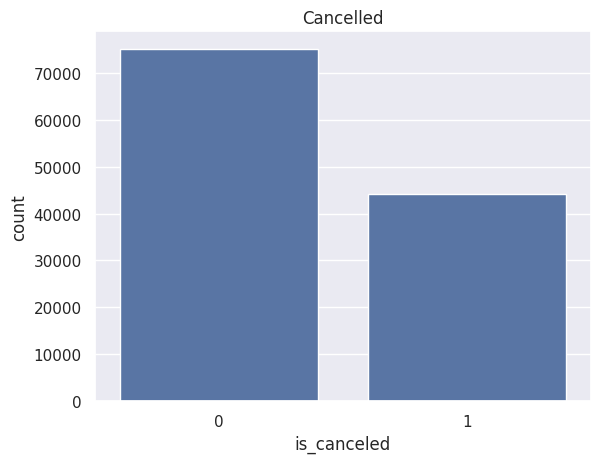

In [ ]:
# Visualize canceled reservations
sns.countplot(data=df_hotels, x='is_canceled')
plt.title('Cancelled')
plt.show()

In [ ]:
# Calculate the percentage of canceled reservations for City Hotel and Resort Hotel
city_hotel_cancel_percentage = round(100 * (len(df_hotels[(df_hotels.hotel == 'City Hotel') & (df_hotels.is_canceled == 1)]) / len(df_hotels[df_hotels.hotel == 'City Hotel'])), 2)
resort_hotel_cancel_percentage = round(100 * (len(df_hotels[(df_hotels.hotel == 'Resort Hotel') & (df_hotels.is_canceled == 1)]) / len(df_hotels[df_hotels.hotel == 'Resort Hotel'])), 2)

print(f"City Hotel Cancel Percentage: {city_hotel_cancel_percentage}%")
print(f"Resort Hotel Cancel Percentage: {resort_hotel_cancel_percentage}%")

City Hotel Cancel Percentage: 41.73%
Resort Hotel Cancel Percentage: 27.76%


In [ ]:
# Filter data to only include visitors who don't cancel reservations
df_checkout = df_hotels[df_hotels.is_canceled == 0]

In [ ]:
# Show the number of reservations per month of arrival for each type of hotel
df_checkout.groupby(['hotel', 'arrival_date_month'])['id'].nunique()

hotel         arrival_date_month
City Hotel    April                 4015
              August                5381
              December              2392
              February              3064
              January               2254
              July                  4782
              June                  4366
              March                 4072
              May                   4579
              November              2696
              October               4337
              September             4290
Resort Hotel  April                 2550
              August                3257
              December              2017
              February              2308
              January               1868
              July                  3137
              June                  2038
              March                 2573
              May                   2535
              November              1976
              October               2577
              September             2102
Name: id, dtype: int64

In [ ]:
# Map month names to numbers
import calendar
month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}
df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)

<ipython-input-10-872684186389>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)


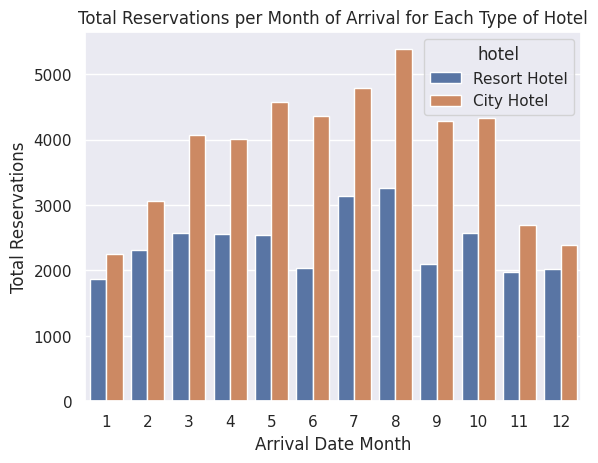

In [ ]:
# Visualize reservations per month for each type of hotel
sns.countplot(data=df_checkout, x='arrival_date_month_number', hue='hotel')
plt.xlabel('Arrival Date Month')
plt.ylabel('Total Reservations')
plt.title('Total Reservations per Month of Arrival for Each Type of Hotel')
plt.show()

In [ ]:
# Create a new column for arrival date
df_checkout['arrival_date'] = df_checkout['arrival_date_year'].astype('str') + '-' + \
                              df_checkout.arrival_date_month_number.astype('str').str.pad(2, fillchar='0') + '-' + \
                              df_checkout.arrival_date_day_of_month.astype('str').str.pad(2, fillchar='0')

# Convert arrival_date to datetime type
df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)

<ipython-input-12-e85ee52e0a13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = df_checkout['arrival_date_year'].astype('str') + '-' + \
<ipython-input-12-e85ee52e0a13>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)


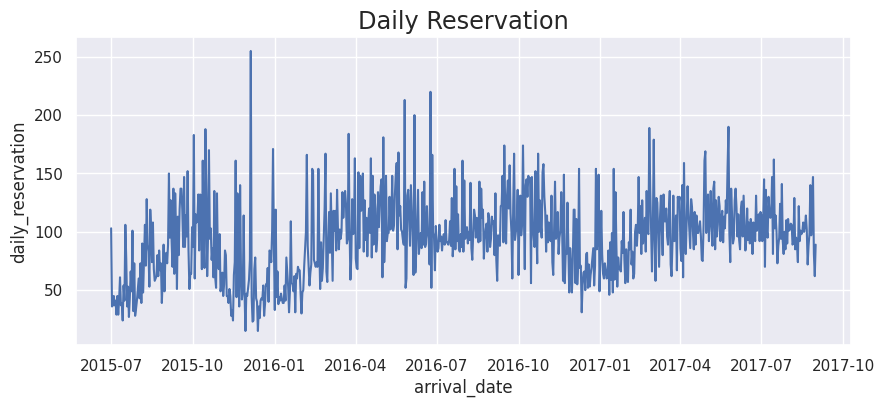

In [ ]:
# Create a dataframe for daily reservations
df_daily_reservation = df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0: 'daily_reservation'})

# Visualize daily reservations
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_daily_reservation, x='arrival_date', y='daily_reservation')
plt.title('Daily Reservation', fontsize='x-large')
plt.show()

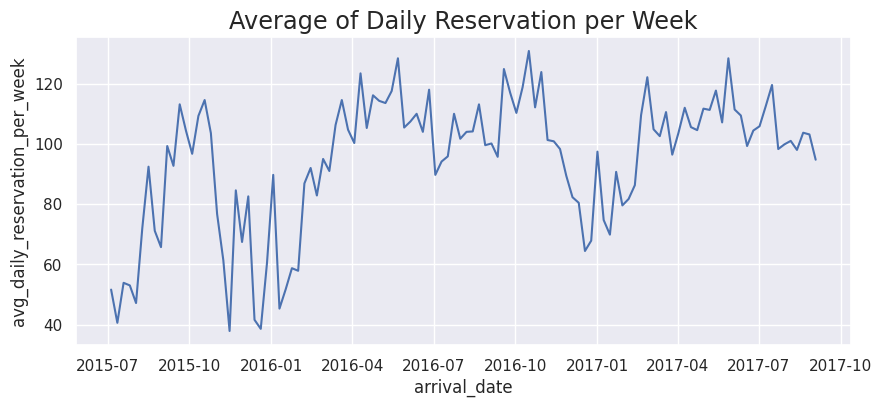

In [ ]:
# Create a dataframe for average daily reservations per week
df_avg_daily_reservation_per_week = round(df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0: 'avg_daily_reservation_per_week'}).resample('W', on='arrival_date')['avg_daily_reservation_per_week'].mean().reset_index(), 2)

# Visualize average daily reservations per week
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_avg_daily_reservation_per_week, x='arrival_date', y='avg_daily_reservation_per_week')
plt.title('Average of Daily Reservation per Week', fontsize='x-large')
plt.show()

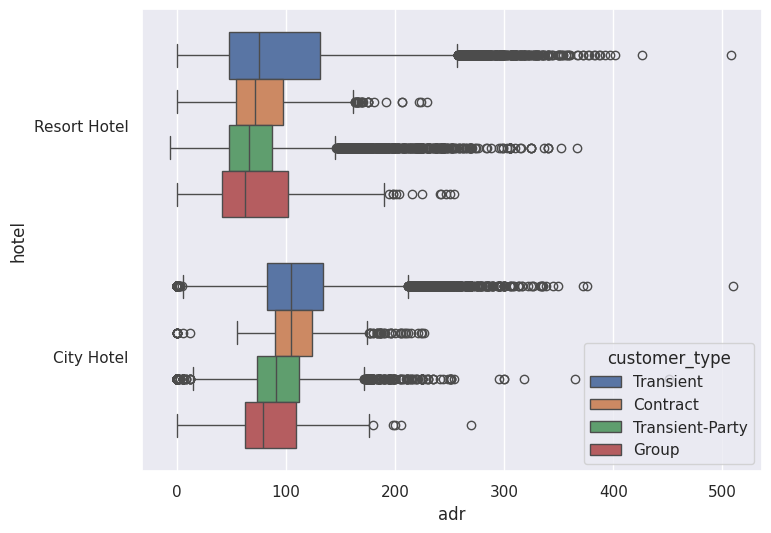

In [ ]:
# Calculate average ADR based on hotel type and customer type
round(df_checkout.groupby(['hotel', 'customer_type'])['adr'].mean(), 2)

# Visualize ADR distribution by customer type and hotel type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_checkout, x='adr', y='hotel', hue='customer_type')
plt.show()

In [ ]:
# Import country codes and coordinates dataset
df_country = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')

# Clean and merge country data
df_country['code'] = df_country['Alpha-3 code'].str.replace('"', '').str.strip()
df_merged = pd.merge(df_checkout[['id', 'country']],
                     df_country[['Country', 'code']],
                     left_on='country',
                     right_on='code',
                     indicator=True,
                     how='left')

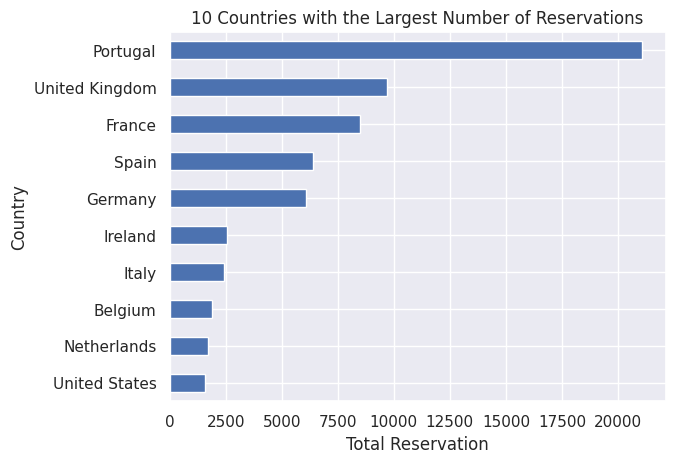

In [ ]:
# Show top 10 countries with the largest number of reservations
df_merged.Country.value_counts().head(10)

# Visualize top 10 countries
df_merged.Country.value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.xlabel('Total Reservation')
plt.ylabel('Country')
plt.title('10 Countries with the Largest Number of Reservations')
plt.show()

In [ ]:
# Calculate average guests per reservation
df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies
round(df_checkout.total_guest.mean(), 0)

# Find the reservation with the highest number of guests
df_checkout.total_guest.max()
df_checkout[df_checkout.total_guest == df_checkout.total_guest.max()].T

<ipython-input-18-7853205ac92f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies


,46619
id,46619
hotel,City Hotel
is_canceled,0
lead_time,37
arrival_date_year,2016
arrival_date_month,January
arrival_date_week_number,3
arrival_date_day_of_month,12
stays_in_weekend_nights,0
stays_in_week_nights,2
